In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

https://www.kaggle.com/datasets/hamjashaikh/mental-health-detection-dataset/data

In [490]:
df = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Dia 4/Deepression.csv')
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [491]:
columnas_ingles_a_espanol = {
    'Number': 'Número',
    'Sleep': 'Sueño',
    'Appetite': 'Apetito',
    'Interest': 'Interés',
    'Fatigue': 'Fatiga',
    'Worthlessness': 'Inutilidad',
    'Concentration': 'Concentración',
    'Agitation': 'Agitación',
    'Suicidal Ideation': 'Ideación Suicida',
    'Sleep Disturbance': 'Problemas para Dormir',
    'Aggression': 'Agresión',
    'Panic Attacks': 'Ataques de Pánico',
    'Hopelessness': 'Desesperanza',
    'Restlessness': 'Inquietud',
    'Low Energy': 'Baja Energía',
    'Depression State': 'Estado de Depresión'
}

df_espanol = df.rename(columns=columnas_ingles_a_espanol)
df_espanol.head()

,Number,Sueño,Apetito,Interés,Fatiga,Inutilidad,Concentración,Agitación,Ideación Suicida,Problemas para Dormir,Agresión,Ataques de Pánico,Desesperanza,Inquietud,Baja Energía,Estado de Depresión
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [492]:
df2 = df.copy()
print('Número de observaciones = {}'.format(df2.shape[0]))
print('Total de variables disponibles = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())

Número de observaciones = 813
Total de variables disponibles = 16 
Columnas que cuentan con un valor nulo-
Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64


In [493]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [494]:
df2['Depression State'].value_counts()

Depression State
No depression       157
Mild                117
Moderate            109
Severe              108
\tNo depression      15
\tModerate           11
\tMild               11
\tSevere             10
2\tNo depression      1
5\tNo depression      1
Name: count, dtype: int64

In [495]:
df2['Depression State'] = df2['Depression State'].str.replace('\t','')
df2['Depression State'] = df2['Depression State'].str.replace('2','')
df2['Depression State'] = df2['Depression State'].str.replace('5','')
df2['Depression State'].value_counts()

Depression State
No depression    174
Mild             128
Moderate         120
Severe           118
Name: count, dtype: int64

In [496]:
depression_interpolate = df2['Depression State'].replace({'No depression':0, 'Mild':1 , 'Moderate': 2, 'Severe':3})
depression_interpolate = depression_interpolate.interpolate()
depression_interpolate.value_counts()

C:\Users\FRANK\AppData\Local\Temp\ipykernel_21788\3838160721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  depression_interpolate = df2['Depression State'].replace({'No depression':0, 'Mild':1 , 'Moderate': 2, 'Severe':3})


Depression State
2.0    393
0.0    174
1.0    128
3.0    118
Name: count, dtype: int64

In [497]:
depression_interpolate = depression_interpolate.replace({0: 'No depression', 1: 'Mild', 2: 'Moderate', 3: 'Severe'})
df2['Depression State'] = depression_interpolate
df2['Depression State'].value_counts()

Depression State
Moderate         393
No depression    174
Mild             128
Severe           118
Name: count, dtype: int64

In [498]:
df2.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State       0
dtype: int64

In [499]:
columns_to_interpolate = df2[['Sleep',
                          'Appetite', 
                          'Interest', 
                          'Fatigue', 
                          'Worthlessness',
                          'Concentration',
                          'Agitation',
                          'Suicidal Ideation',
                          'Sleep Disturbance',
                          'Aggression',
                          'Panic Attacks',
                          'Hopelessness',
                          'Restlessness',
                          'Low Energy']]

In [500]:
columns_to_interpolate = columns_to_interpolate.interpolate()
df2[['Sleep',
    'Appetite', 
    'Interest', 
    'Fatigue', 
    'Worthlessness',
    'Concentration',
    'Agitation',
    'Suicidal Ideation',
    'Sleep Disturbance',
    'Aggression',
    'Panic Attacks',
    'Hopelessness',
    'Restlessness',
    'Low Energy']] = columns_to_interpolate


In [501]:
print('Número de observaciones = {}'.format(df2.shape[0]))
print('Total de variables disponibles = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo-')
print(df2.isnull().sum())

Número de observaciones = 813
Total de variables disponibles = 16 
Columnas que cuentan con un valor nulo-
Number               0
Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64


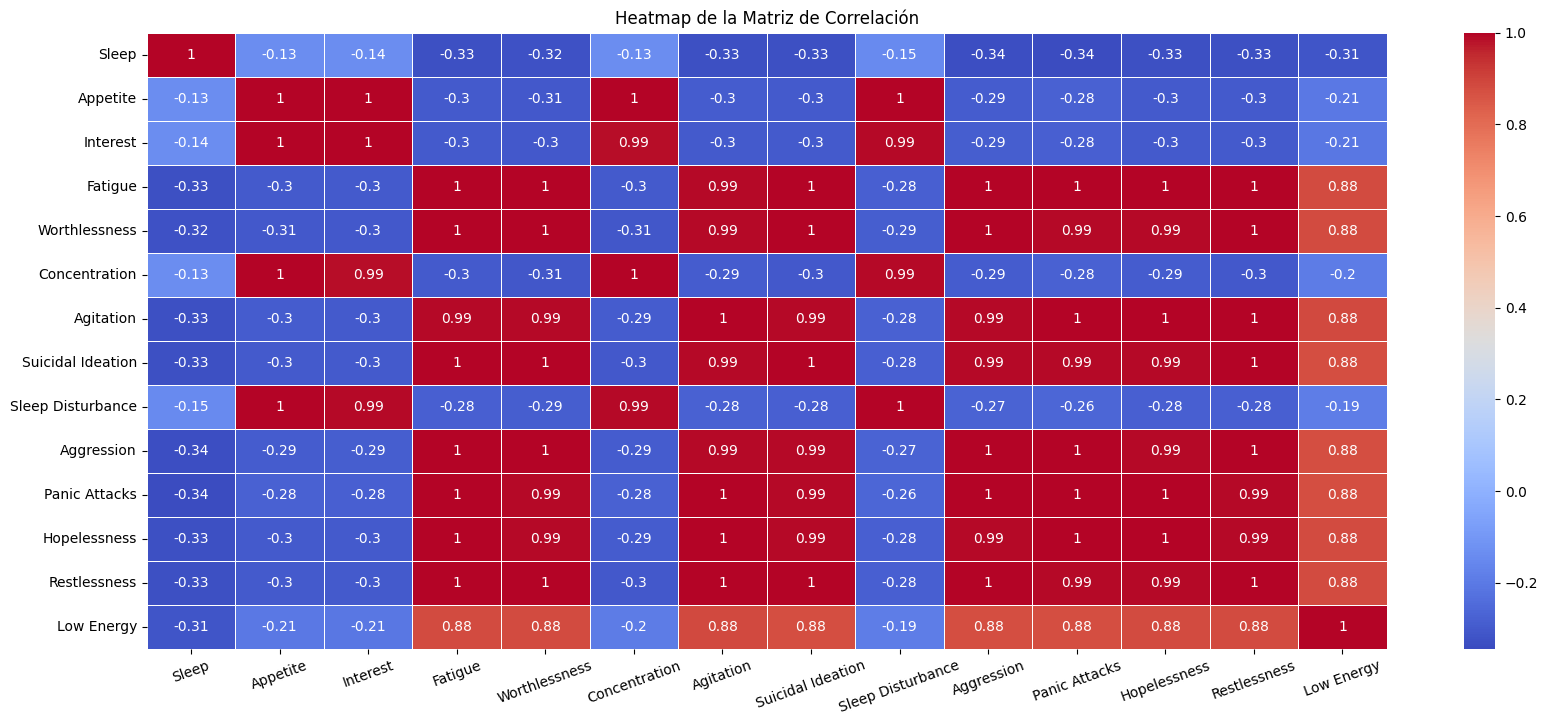

In [502]:
correlation = df2[[
    'Sleep',
    'Appetite', 
    'Interest', 
    'Fatigue', 
    'Worthlessness',
    'Concentration',
    'Agitation',
    'Suicidal Ideation',
    'Sleep Disturbance',
    'Aggression',
    'Panic Attacks',
    'Hopelessness',
    'Restlessness',
    'Low Energy']].corr()

plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=20)
plt.title('Heatmap de la Matriz de Correlación')
plt.show()

In [503]:
df2['Depression State'].value_counts()

Depression State
Moderate         393
No depression    174
Mild             128
Severe           118
Name: count, dtype: int64

# Regresión Logistica Ordinal

In [504]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [505]:
df2['Depression State'] = df2['Depression State'].replace({'No depression':0,'Mild':1,'Moderate':2,'Severe':3}).astype(int)

C:\Users\FRANK\AppData\Local\Temp\ipykernel_21788\799002204.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Depression State'] = df2['Depression State'].replace({'No depression':0,'Mild':1,'Moderate':2,'Severe':3}).astype(int)


# No depresion = 0
# Mild (Leve) = 1
# Moderate (Moderado) = 2
# Severe (Severo) = 3

In [506]:
# Preparar los datos
X = df2.drop('Depression State', axis=1)
y = df2['Depression State']

# modelo ordinal
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

print(result.summary())

Optimization terminated successfully.
         Current function value: 1.172095
         Iterations: 145
         Function evaluations: 149
         Gradient evaluations: 149
                             OrderedModel Results                             
Dep. Variable:       Depression State   Log-Likelihood:                -952.91
Model:                   OrderedModel   AIC:                             1942.
Method:            Maximum Likelihood   BIC:                             2026.
Date:                Thu, 06 Jun 2024                                         
Time:                        03:42:52                                         
No. Observations:                 813                                         
Df Residuals:                     795                                         
Df Model:                          15                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------